# Part 0: environment (it will take around 10-20 mins)

In [1]:
!pip install keras.models

In [2]:
!pip install scikit-image==0.18.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 14.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.9 MB/s eta 0:00:00
  Created wheel for scikit-image: filename=scikit_image-0.18.3-cp311-cp311-linux_x86_64.whl size=37878282 sha256=707b87a1280a36035d27e521e5dab655544a1796a6c41749079b119677869d14
  Stored in directory: /root/.cache/pip/wheels/e3/f1/e0/18ca2948c8e8670f1f357bb1704d22638ea3cb247f77fe0ce2
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.2
    Uninstalling scikit-image-0.25.2:
      Successfully uninstalled scikit-image-0.25.2


In [3]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalle

In [4]:
!pip uninstall Pillow
!pip install Pillow==9.5.0

Found existing installation: pillow 11.1.0
Uninstalling pillow-11.1.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/PIL/*
    /usr/local/lib/python3.11/dist-packages/pillow-11.1.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libXau-154567c4.so.6.0.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libbrotlicommon-5b2eba61.so.1.1.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libbrotlidec-a621e7f2.so.1.1.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libfreetype-edd71024.so.6.20.1
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libharfbuzz-07d0ad17.so.0.61010.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libjpeg-0988b44a.so.62.4.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/liblcms2-525547ec.so.2.0.16
    /usr/local/lib/python3.11/dist-packages/pillow.libs/liblzma-a5872208.so.5.6.3
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libopenjp2-ca16f087.so.2.5.3
    /usr/local/lib/pytho

# Part 1: Segmentation

## 0.libs

In [1]:
import numpy as np
print(np.__version__)

1.26.4


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/icebergtrack/IceDT-main/libs')

import os
# import conda

# conda_file_dir = conda.__file__
# conda_dir = conda_file_dir.split('lib')[0]
# proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
# os.environ["PROJ_LIB"] = proj_lib

from osgeo import gdal
from timeit import default_timer as timer
from skimage import img_as_ubyte
from termcolor import colored
from keras.models import load_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import joblib
import gc

import warnings
warnings.simplefilter("ignore")

In [4]:
# libs
import inspecao_frames as buscaice_frames

In [5]:
import geraIcebergsDB as gIDB

In [6]:
import training as fTrein

In [7]:
import myGeoTools as mgt

In [8]:
import getClassification as goclass
import transfDimensionalidade as tdim
from myutils import imresize, convert_bytes, fix_coast, convert, match_hist
from IPython.display import clear_output # progressbar
%matplotlib inline

Global Flags

In [9]:
gdal.UseExceptions()
sfull = timer()

## FLAGS ###########################################################################
# Create IcebergDB - This Flag only enables classify to purpose of save iceberg and non iceberg picks
geraDBIce = False

# Save or load training models
saveTreino = True

loadTreino = True if not saveTreino else False

# Enable training set backfeed
backfeed = False

# Export products
is2export = False

## 1.Open data


### 1.1 Open geotiff data

In [ ]:
# SAR IMPUT
# /content/drive/MyDrive/icebergtrack/iceberg_sentinel/tif/merge/2021-05-23.tif
# /content/drive/MyDrive/icebergtrack/IceDT-main/SAR/RAMP_1997.zip

# arquivo_path = '/content/drive/MyDrive/icebergtrack/IceDT-main/SAR/'
# image_name = 'RAMP_1997.tif'

arquivo_path = '/content/drive/MyDrive/icebergtrack/sentinel1/hh/mark1.0/'#'/content/drive/MyDrive/icebergtrack/iceberg_sentinel/tif/sermilik fjord/mark1.0/'
# /content/drive/MyDrive/icebergtrack/s1_rtc_rename/S1A_IW_GRDH_1SDH_20240809T091233_20240809T091258_055134_06B802_rtc.tif
# /content/drive/MyDrive/icebergtrack/s1_rtc_rename/S1A_IW_GRDH_1SDH_20240811T085535_20240811T085600_055163_06B90A_rtc.tif
# /content/drive/MyDrive/icebergtrack/s1_rtc_rename/S1A_IW_GRDH_1SDH_20240816T090355_20240816T090420_055236_06BBAE_rtc.tif
# /content/drive/MyDrive/icebergtrack/s1_rtc_rename/S1A_IW_GRDH_1SDH_20240821T091208_20240821T091233_055309_06BE5F_rtc.tif
# /content/drive/MyDrive/icebergtrack/s1_rtc_rename/S1A_IW_GRDH_1SDH_20240823T085535_20240823T085600_055338_06BF7D_rtc.tif
# /content/drive/MyDrive/icebergtrack/s1_rtc_rename/S1A_IW_GRDH_1SDH_20240828T090420_20240828T090445_055411_06C222_rtc.tif

# /content/drive/MyDrive/icebergtrack/sentinel1/hh/mark1.1/S1A_IW_GRDH_1SDH_20240804T090355_20240804T090420_055061_06B54A_rtc.tif
# 2022-01-04 / 06/ 11 / 16 / 18 / 20 / 23 / 28 / 30
# 2022-02-04 / 09 / 11 / 16 / 21 / 23 /
# 2022-03-05 / 07 / 12 / 17 / 19 / 24 / 29 / 31
# 2022-06-04 / 09/ 11 / 16 / 21 / 23 / 28
image_name = '2022-03-29.tif'

In [ ]:
## START PROCESSING ###########################################################
global img
cont_removidas = 0

f_name, f_ext = image_name.split('.')

plt.clf()
plt.close("all")

print(colored('Data: ', 'blue'), image_name)

Data:  2022-03-29.tif


In [ ]:
gtiff = arquivo_path + image_name
ds = gdal.Open(gtiff)

# # Number of rows and columns
# rows = ds.RasterYSize
# cols = ds.RasterXSize
# print(f"Rows: {rows}, Columns: {cols}")

# # Number of raster bands
# bands = ds.RasterCount
# print(f"Number of Bands: {bands}")

# # Projection and geotransformation
# projection = ds.GetProjection()
# geotransform = ds.GetGeoTransform()
# print(f"Projection: {projection}")
# print(f"Geotransform: {geotransform}")

# band = ds.GetRasterBand(1)  # Access the first band
# data = band.ReadAsArray()   # Read band data as a NumPy array
# print(data.shape)           # Display the shape of the data

In [ ]:
# import numpy as np
# from osgeo import gdal
# from skimage.util import img_as_ubyte

# # Load the GeoTIFF
# ds = gdal.Open(gtiff)
band = ds.GetRasterBand(1)
img = band.ReadAsArray()

# Calculate statistics for stretching
mean = np.nanmean(img)  # Use nanmean if there are NoData values
std = np.nanstd(img)    # Use nanstd if there are NoData values
vmin = mean - 2 * std
vmax = mean + 2 * std

# Apply the stretch
stretched = np.clip(img, vmin, vmax)  # Clip values outside 2σ range
stretched = (stretched - vmin) / (vmax - vmin)  # Normalize to [0, 1]
stretched = img_as_ubyte(stretched)  # Scale to 0-255 and convert to uint8

rowsb, colsb = stretched.shape
stretched.shape

# For visualization with matplotlib (optional)
# import matplotlib.pyplot as plt
# plt.imshow(stretched, cmap='gray')
# plt.show()

(1669, 2053)

In [ ]:
img = stretched
img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  96, 100, 102],
       [  0,   0,   0, ...,  96, 100, 102],
       [  0,   0,   0, ...,  99, 101, 101]], dtype=uint8)

### 1.2 Get geo-information

In [ ]:
# Getting scene bounds
# (-260415.0, 30.0, 0.0, 7453725.0, 0.0, -30.0)
# Upper-left x-coordinate (origin), Pixel width (x-resolution), Rotation, Upper-left y-coordinate (origin), Rotation, Pixel height
gt = ds.GetGeoTransform()

colunas = ds.RasterXSize # The number of columns (width) in the raster dataset
linhas = ds.RasterYSize # The number of rows (height) in the raster dataset.
# # bandas = ds.RasterCount
gt

(542299.2861839096,
 9.945244893659446,
 0.0,
 7363439.442619442,
 0.0,
 -7.595485316790479)

### 1.3 Prepare data-structures

In [ ]:
# mask = pickle.load(open("/content/drive/MyDrive/icebergtrack/IceDT-main/AuxFiles/mask.pkl", "rb"))
mask = pickle.load(open("/content/drive/MyDrive/icebergtrack/fjords_epsg32627/greenland_mask2.pkl", "rb"))

mask_gt = pickle.load(open("/content/drive/MyDrive/icebergtrack/IceDT-main/AuxFiles/mask_gt.pkl", "rb")) ### ???????????????????????

In [ ]:
# Pixel size (m)
pixel_size = round(gt[1])
print(colored("Pixel size: ", "blue"), pixel_size, 'm')

Pixel size:  10 m


In [ ]:
#Area by pixel (m^2)
pixel_area = pixel_size**2
pixel_area

100

In [ ]:
# Getting scene bounds as lat lon (pixel2coord(lon, lat))
x1, y1 = mgt.pixel2coord(ds, 0, 0)
print(x1,y1)
x2, y2 = mgt.pixel2coord(ds, 0, linhas-1)
print(x2,y2)
x3, y3 = mgt.pixel2coord(ds, colunas-1, 0)
print(x3,y3)
x4, y4 = mgt.pixel2coord(ds, colunas-1, linhas-1)
print(x4,y4)

542304.2588063565 7363435.644876784
542304.2588063565 7350766.375368377
562711.9013281456 7363435.644876784
562711.9013281456 7350766.375368377


In [ ]:
## Working land mask based on shape files
mask_crop = mgt.crop_image(mask_gt, mask, x1, y1, x3, y2) #???
maskl, maskc = mask_crop.shape
# del mask
maskl, maskc

(5, 0)

In [ ]:
#Tranforming EPS3031 coordinates system to WGS84
x1, y1 = mgt.epsg3031toepsg4326(x1, y1)  # Corner (ULX,ULY)
x2, y2 = mgt.epsg3031toepsg4326(x2, y2)  # Corner (LLX,LLY)
x3, y3 = mgt.epsg3031toepsg4326(x3, y3)  # Corner (URX,URY)
x4, y4 = mgt.epsg3031toepsg4326(x4, y4)  # Corner (LRX,LRY)

corners_wgs84 = {'UL': [x1, y1], 'LL': [x2, y2], 'UR': [x3, y3], 'LR': [x4, y4]}
corners_wgs84
if (maskc == 0 or maskl == 0):
    # os.remove(gtiff)
    cont_removidas += 1

lin, col = img.shape
mask_crop = imresize(mask_crop, (lin, col))

corners_wgs84

{'UL': [-38.05349587643132, 66.38761195922683],
 'LL': [-38.05776492826706, 66.27396867941498],
 'UR': [-37.597041328887705, 66.38417281633538],
 'LR': [-37.60336777539251, 66.27054796913836]}

Scene Bounds:  {'UL': [-38.05349587643132, 66.38761195922683], 'LL': [-38.05776492826706, 66.27396867941498], 'UR': [-37.597041328887705, 66.38417281633538], 'LR': [-37.60336777539251, 66.27054796913836]}
SAR INPUT: 2022-03-29.tif


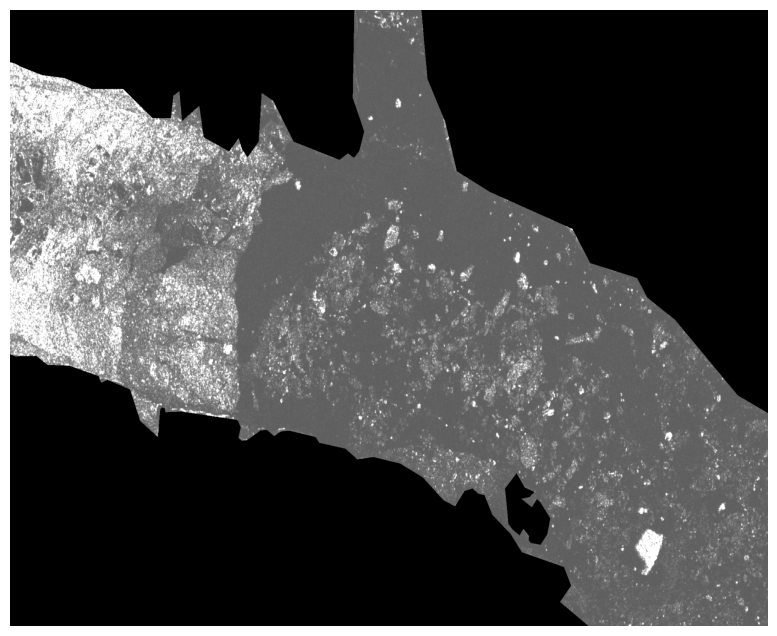

In [ ]:
#Depends on the dataset used... got directly from the label
# data_img = image_name[14:22]
# ano_img = image_name[14:18]
data_img = image_name[:-4]
ano_img = '2013'
data_img

##Fixing nearest costal problem and getting masks info
land_pixels, area_pixels = fix_coast(mask_crop, img)

scene_info = {'image_name': image_name, 'file_path': arquivo_path, 'rows': linhas, 'colums': colunas,
              'year': ano_img, 'date_img': data_img, 'ds': ds, 'pixel_size': pixel_size,'pixel_area': pixel_area,
              'land_pixels': land_pixels, 'area_pixels': area_pixels, 'corners_wgs': corners_wgs84}

print(colored("Scene Bounds: ", "blue"), corners_wgs84)

# del linhas, colunas, ano_img
# del data_img, ds, pixel_size, pixel_area, land_pixels
# del area_pixels, corners_wgs84

# del mask_crop
gc.collect()
print('SAR INPUT: '+image_name)

plt.figure('SAR INPUT', figsize=(10, 8))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## 2.Segmentation in 2 levels


Superpixel Graph-based Felzenwalb for large objects with high intensity/texture variation over the object surface

Watershed for small objects

Segmenting ...
Pre-processing for segmentation, histogram score 0.884 of 1.0
Computing objects.
Felzemwalb Segmentation for giants


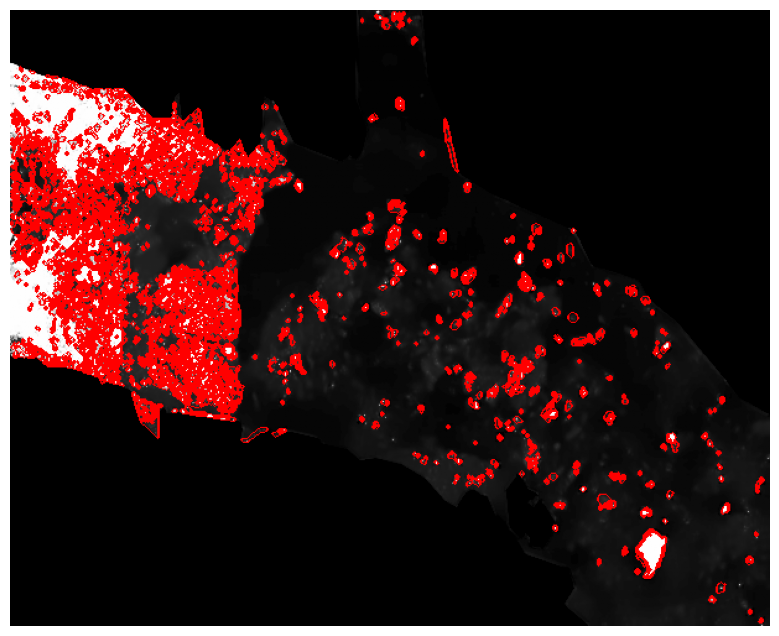

Computing segmentation metadata...
Pre-processing for segmentation, histogram score 0.897 of 1.0
Computing objects.
Watershed Segmentation for no giants


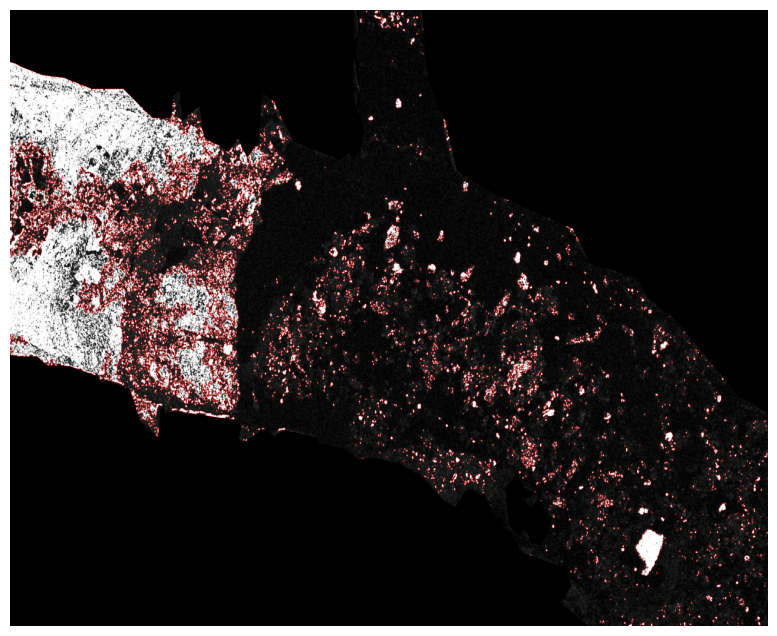

Computing segmentation metadata...
Done!  0.339  min
Total Objects for classification:  6


In [ ]:
## Segmentation and Morphologycal infos extraction ####################################################
# Using 2 stages segmentations 1 for giant icebergs and other for no giant
print(colored('Segmenting ...', 'blue'))
s = timer()
sub_giant = 30 # 20
segOutput = buscaice_frames.buscaIce(np.copy(img), rsp=sub_giant, alg=1, minseg=10000, maxseg=np.inf)
segOutput2 = buscaice_frames.buscaIce(np.copy(img), rsp=100, alg=2, minseg=500, maxseg=10000) # rsp=100
e = timer()
print('Done! ', round((e - s) / 60, 3), ' min')

print(colored('Total Objects for classification: ', 'blue'), len(segOutput2.idf)+len(segOutput.idf))

## 3.Export segments from segmentation (no-classified)

In [ ]:
## Set Icebergs e Features database ###################################################################
path_IDB = scene_info['file_path'] + 'db/'
if geraDBIce:
    gIDB.geraIceDB(path_IDB, np.copy(img), scene_info['image_name'], segOutput)

## 4.Training stage for classification


Is possible to load or save as pkl

In [ ]:
## Training supervised classifiers ###################################################################
# if loadTreino:
if True:

    shape_rf = joblib.load('/content/drive/MyDrive/icebergtrack/IceDT-main/models/ens_5.pkl')
    deep_mlp = load_model('/content/drive/MyDrive/icebergtrack/IceDT-main/models/modeldeep_mlp.h5')

    print(colored('Models Loaded.', 'blue'))

else:

    print(colored('Training ...', 'blue'))

    DB_name_1 = pd.read_csv('/content/drive/MyDrive/icebergtrack/IceDT-main/models/TrainSet_FULL.txt', sep=' ', header=None)
    DB_name_2 = pd.read_csv('/content/drive/MyDrive/icebergtrack/IceDT-main/models/TrainSet_DEEP.txt', sep=' ', header=None)

    shape_rf = fTrein.settreino_ForestComite(DB_name_1)
    deep_mlp = fTrein.set_deeplearning(DB_name_2)

    if saveTreino:
        joblib.dump(shape_rf, '/content/drive/MyDrive/icebergtrack/IceDT-main/models/ens_5.pkl')
        deep_mlp.save('/content/drive/MyDrive/icebergtrack/IceDT-main/models/modeldeep_mlp.h5')

        print(colored('Models Saved.', 'blue'))

committee = [shape_rf, deep_mlp]
del shape_rf, deep_mlp

Models Loaded.


## 5.Classification

large objects

In [ ]:
ices_df = pd.DataFrame(columns=('id', 'latitude', 'longitude', 'minoraxis_px',
                                  'majoraxis_px', 'area_px', 'perimeter_px', 'shape'))
total_detected = 0
nicebergs, img_resultg, ices_df = goclass.goClassification(segOutput,ices_df, imresize(img, (sub_giant/100.0), interp='bilinear'),
                                                  committee, scene_info, img_result=[], backfeed=backfeed,
                                                  fullplot=False, sub_giant=sub_giant)
total_detected += nicebergs
print(colored('Total classified from stage 1: ', 'blue'), total_detected)

Classifying  0 objects.
Pre-processing for segmentation, histogram score 0.889 of 1.0
Computing objects.
Total classified from stage 1:  0


Small objects

Classification Progress: [##################################################] 100.0% (100.0)% detected icebergs: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Computing metadata ...
SAR Base to Classification.


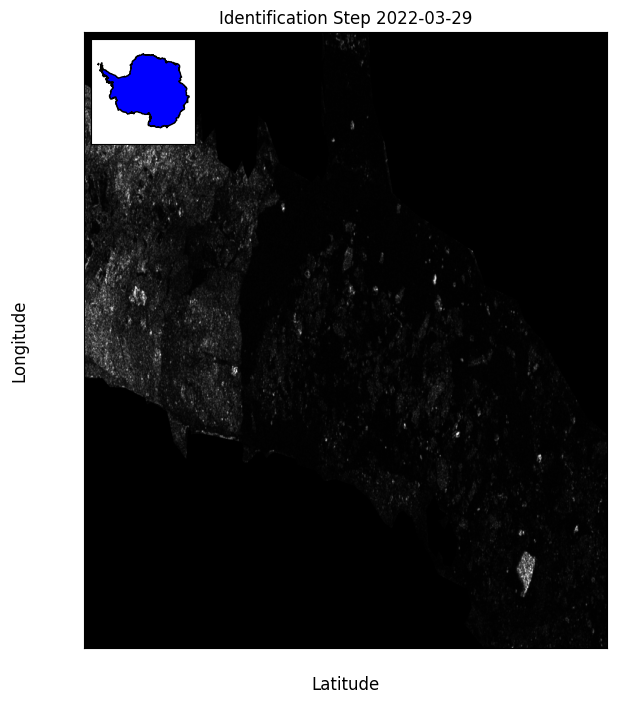

Classification product.


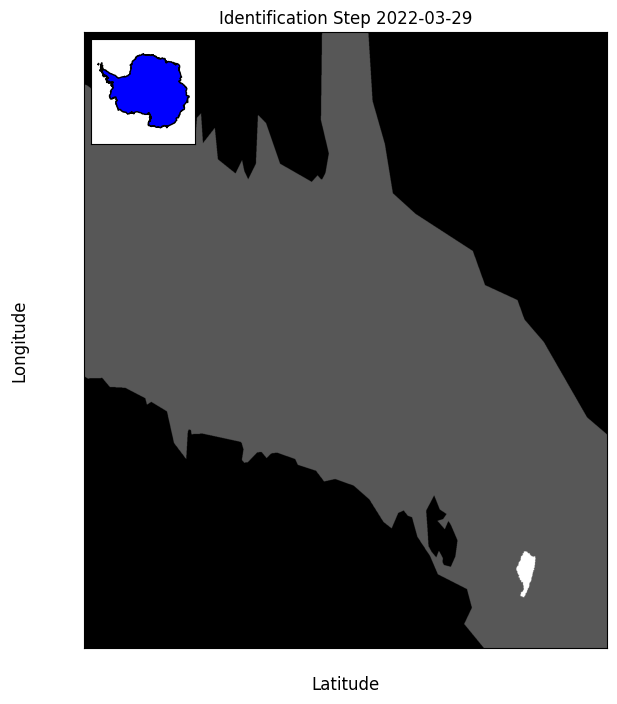

Total Icebergs detected:  1
Process complete ... 139.794  min


In [ ]:
gc.collect()
print('Looking for NO giant icebergs')
img_result = np.zeros((rowsb, colsb))
img_result[scene_info['area_pixels']] = 75
img_result[scene_info['land_pixels'][0], scene_info['land_pixels'][1]] = 110

if total_detected > 0:
    img_resultg = imresize(img_resultg, (rowsb, colsb))
    img_result[img_resultg != 0] = img_resultg[img_resultg != 0]
    del img_resultg

# segOutput2
nicebergs, img_result, ices_df = goclass.goClassification(segOutput2,ices_df, np.copy(img), committee, scene_info,
                                                          img_result=img_result, backfeed=backfeed, fullplot=True,# fullplot=True,
                                                          plot_original=True, save_identify=is2export)
# ^^^^ There is no epsg 32627 or 32624 in basemap, so can't draw ^^^^^

total_detected += nicebergs

print(colored('Total Icebergs detected: ', 'blue'), total_detected)

efull = timer()
print(colored('Process complete ...', 'blue'), round((efull - sfull) / 60, 3), ' min')

## 6.Analyze and retrieve metadata

Metadata from Classification

In [ ]:
# ices_df['minoraxis_km'] = (ices_df['minoraxis_px'] * scene_info['pixel_size']) * 1e-3
# ices_df['majoraxis_km'] = (ices_df['majoraxis_px'] * scene_info['pixel_size']) * 1e-3
# ices_df['perimeter_km'] = (ices_df['perimeter_px'] * scene_info['pixel_size']) * 1e-3
# ices_df['area_km2'] = (ices_df['area_px'] * (scene_info['pixel_size']**2)) * 1e-6
# ices_df['mass_gt'] = (((ices_df['area_km2'] * 1e6) * 250) * 850) * 1e-12

ices_df['datetime'] = image_name[:-4]
ices_df['datetime'] = pd.to_datetime(ices_df['datetime'])

# ices_df

In [ ]:
iceberg_metadata = pd.concat([ices_df.loc[:,'datetime'], ices_df.loc[:,'latitude':'shape']], axis=1)
iceberg_metadata

,datetime,latitude,longitude,minoraxis_px,majoraxis_px,area_px,perimeter_px,shape
0,2022-03-29,66.285408,-37.673692,63,116,5176,395,"[61, 62, 62, 60, 58, 58, 55, 54, 53, 52, 49, 4..."


In [ ]:
# CREATE a new csv file
# iceberg_metadata.to_csv('/content/drive/MyDrive/icebergtrack/sentinel1/iceberg202201.csv', index=False)

In [ ]:
# ADD new rows to specific csv file
# iceberg_metadata.to_csv('/content/drive/MyDrive/icebergtrack/sentinel1/iceberg202201.csv', mode='a', header=False, index=False)

In [ ]:
file_path = '/content/drive/MyDrive/icebergtrack/sentinel1/iceberg202203.csv'
if os.path.exists(file_path):
  # ADD new rows to specific csv file
  print('add new rows')
  iceberg_metadata.to_csv(file_path, mode='a', header=False, index=False)
else:
  # CREATE a new csv file
  print('create new csv file')
  iceberg_metadata.to_csv(file_path, index=False)

add new rows


## ***Loop over 2022***

In [ ]:
from os import listdir
from os.path import isfile, join
import os

In [ ]:
path = '/content/drive/MyDrive/icebergtrack/sentinel1/hh/sermilik/'
onlyfiles = [f for f in listdir(path) if (isfile(join(path, f)) and f[:4] == '2022')]
onlyfiles.sort()

In [ ]:
onlyfiles[12:19]

['2022-02-11.tif',
 '2022-02-16.tif',
 '2022-02-21.tif',
 '2022-02-23.tif',
 '2022-03-05.tif',
 '2022-03-07.tif',
 '2022-03-12.tif']

Classification Progress: [##################################################] 100.0% (100.0)% detected icebergs: 76
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Computing metadata ...
SAR Base to Classification.


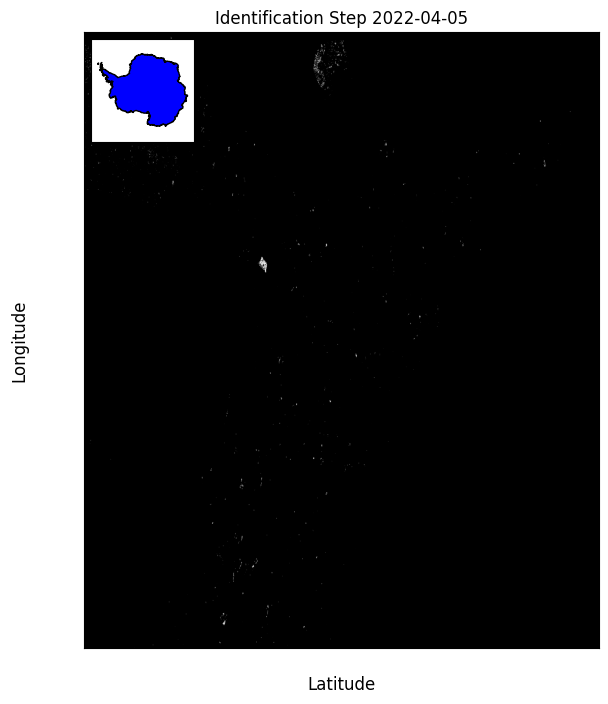

Classification product.


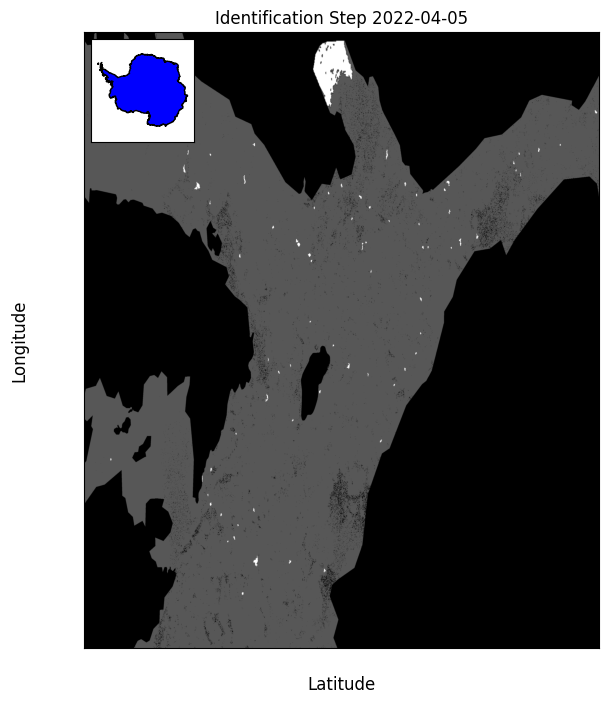

Total Icebergs detected:  77
Process complete ... 77.528  min
add new rows
SAR INPUT: 2022-04-10.tif


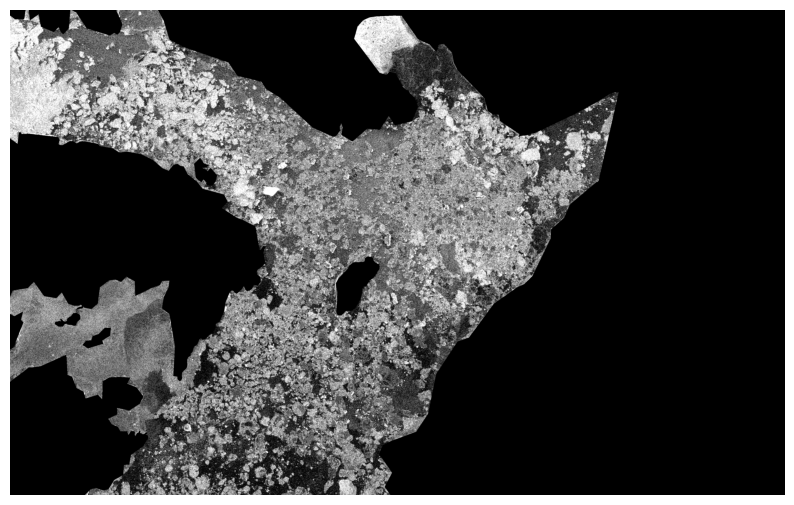

Segmenting ...
Pre-processing for segmentation, histogram score 0.916 of 1.0
Computing objects.
Felzemwalb Segmentation for giants


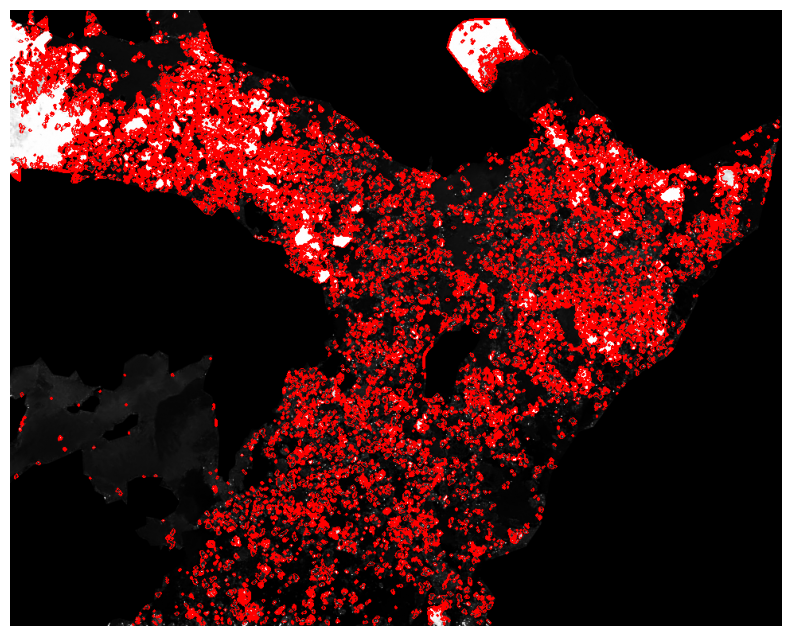

Computing segmentation metadata...
Pre-processing for segmentation, histogram score 0.92 of 1.0
Computing objects.


KeyboardInterrupt: 

In [ ]:
for i in range(len(onlyfiles)):
  # 1. read tif file
  image_name = onlyfiles[i]
  cont_removidas = 0
  f_name, f_ext = image_name.split('.')
  gtiff = path + image_name
  ds = gdal.Open(gtiff)
  band = ds.GetRasterBand(1)
  orig_img = band.ReadAsArray()

  # Calculate statistics for stretching
  mean = np.nanmean(orig_img)  # Use nanmean if there are NoData values
  std = np.nanstd(orig_img)    # Use nanstd if there are NoData values
  vmin = mean - 2 * std
  vmax = mean + 2 * std

  # Apply the stretch
  stretched = np.clip(orig_img, vmin, vmax)  # Clip values outside 2σ range
  stretched = (stretched - vmin) / (vmax - vmin)  # Normalize to [0, 1]
  stretched = img_as_ubyte(stretched)  # Scale to 0-255 and convert to uint8
  rowsb, colsb = stretched.shape
  img = stretched

  # 2. get geo info
  gt = ds.GetGeoTransform()
  colunas = ds.RasterXSize # The number of columns (width) in the raster dataset
  linhas = ds.RasterYSize
  mask = pickle.load(open("/content/drive/MyDrive/icebergtrack/fjords_epsg32627/greenland_mask2.pkl", "rb"))
  mask_gt = pickle.load(open("/content/drive/MyDrive/icebergtrack/IceDT-main/AuxFiles/mask_gt.pkl", "rb"))
  pixel_size = round(gt[1])
  pixel_area = pixel_size**2

  # Getting scene bounds as lat lon (pixel2coord(lon, lat))
  x1, y1 = mgt.pixel2coord(ds, 0, 0)
  x2, y2 = mgt.pixel2coord(ds, 0, linhas-1)
  x3, y3 = mgt.pixel2coord(ds, colunas-1, 0)
  x4, y4 = mgt.pixel2coord(ds, colunas-1, linhas-1)
  mask_crop = mgt.crop_image(mask_gt, mask, x1, y1, x3, y2) #???
  maskl, maskc = mask_crop.shape

  #Tranforming EPS3031 coordinates system to WGS84
  x1, y1 = mgt.epsg3031toepsg4326(x1, y1)  # Corner (ULX,ULY)
  x2, y2 = mgt.epsg3031toepsg4326(x2, y2)  # Corner (LLX,LLY)
  x3, y3 = mgt.epsg3031toepsg4326(x3, y3)  # Corner (URX,URY)
  x4, y4 = mgt.epsg3031toepsg4326(x4, y4)  # Corner (LRX,LRY)
  corners_wgs84 = {'UL': [x1, y1], 'LL': [x2, y2], 'UR': [x3, y3], 'LR': [x4, y4]}
  corners_wgs84
  if (maskc == 0 or maskl == 0):
      # os.remove(gtiff)
      cont_removidas += 1

  lin, col = img.shape
  mask_crop = imresize(mask_crop, (lin, col))
  data_img = image_name[:-4]
  ano_img = '2022'
  ##Fixing nearest costal problem and getting masks info
  land_pixels, area_pixels = fix_coast(mask_crop, img)

  scene_info = {'image_name': image_name, 'file_path': path, 'rows': linhas, 'colums': colunas,
                'year': ano_img, 'date_img': data_img, 'ds': ds, 'pixel_size': pixel_size,'pixel_area': pixel_area,
                'land_pixels': land_pixels, 'area_pixels': area_pixels, 'corners_wgs': corners_wgs84}
  gc.collect()
  print('SAR INPUT: '+image_name)
  plt.figure('SAR INPUT', figsize=(10, 8))
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()

  # 3. segmentation
  # Using 2 stages segmentations 1 for giant icebergs and other for no giant
  print(colored('Segmenting ...', 'blue'))
  s = timer()
  sub_giant = 30 # 20
  segOutput = buscaice_frames.buscaIce(np.copy(img), rsp=sub_giant, alg=1, minseg=10000, maxseg=np.inf)
  segOutput2 = buscaice_frames.buscaIce(np.copy(img), rsp=100, alg=2, minseg=50, maxseg=10000) # rsp=100
  e = timer()
  print('Done! ', round((e - s) / 60, 3), ' min')
  print(colored('Total Objects for classification: ', 'blue'), len(segOutput2.idf)+len(segOutput.idf))

  # 4. Export segments
  path_IDB = scene_info['file_path'] + 'db/'
  if geraDBIce:
      gIDB.geraIceDB(path_IDB, np.copy(img), scene_info['image_name'], segOutput)

  # 5. Train segmentation
  # if loadTreino:
  if True:
      shape_rf = joblib.load('/content/drive/MyDrive/icebergtrack/IceDT-main/models/ens_5.pkl')
      deep_mlp = load_model('/content/drive/MyDrive/icebergtrack/IceDT-main/models/modeldeep_mlp.h5')

      print(colored('Models Loaded.', 'blue'))

  committee = [shape_rf, deep_mlp]
  del shape_rf, deep_mlp

  # 6. classification
  ## large object
  ices_df = pd.DataFrame(columns=('id', 'latitude', 'longitude', 'minoraxis_px',
                                  'majoraxis_px', 'area_px', 'perimeter_px', 'shape'))
  total_detected = 0
  nicebergs, img_resultg, ices_df = goclass.goClassification(segOutput,ices_df, imresize(img, (sub_giant/100.0), interp='bilinear'),
                                                    committee, scene_info, img_result=[], backfeed=backfeed,
                                                    fullplot=False, sub_giant=sub_giant)
  total_detected += nicebergs
  print(colored('Total classified from stage 1: ', 'blue'), total_detected)

  ## small objects
  gc.collect()
  print('Looking for NO giant icebergs')
  img_result = np.zeros((rowsb, colsb))
  img_result[scene_info['area_pixels']] = 75
  img_result[scene_info['land_pixels'][0], scene_info['land_pixels'][1]] = 110
  if total_detected > 0:
      img_resultg = imresize(img_resultg, (rowsb, colsb))
      img_result[img_resultg != 0] = img_resultg[img_resultg != 0]
      del img_resultg

  # segOutput2
  nicebergs, img_result, ices_df = goclass.goClassification(segOutput2,ices_df, np.copy(img), committee, scene_info,
                                                            img_result=img_result, backfeed=backfeed, fullplot=True,# fullplot=True,
                                                            plot_original=True, save_identify=is2export)
  total_detected += nicebergs
  print(colored('Total Icebergs detected: ', 'blue'), total_detected)
  efull = timer()
  print(colored('Process complete ...', 'blue'), round((efull - sfull) / 60, 3), ' min')

  # 7. save the data
  ices_df['datetime'] = image_name[:-4]
  ices_df['datetime'] = pd.to_datetime(ices_df['datetime'])
  iceberg_metadata = pd.concat([ices_df.loc[:,'datetime'], ices_df.loc[:,'latitude':'shape']], axis=1)
  file_path = '/content/drive/MyDrive/icebergtrack/sentinel1/iceberg20220104.csv'
  if os.path.exists(file_path):
    # ADD new rows to specific csv file
    print('add new rows')
    iceberg_metadata.to_csv(file_path, mode='a', header=False, index=False)
  else:
    # CREATE a new csv file
    print('create new csv file')
    iceberg_metadata.to_csv(file_path, index=False)

# Part 2: Tracking

## 0.envir

In [10]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-linux_x86_64.whl size=542096 sha256=e330917ef1e6caeafc6a6066fdc62fa192f67ae3e120fd5cac0e9787059380e6
  Stored in directory: /root/.cache/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw


In [11]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import difflib
import sys
import matplotlib.pyplot as plt
import getMetadata as gmeta # libs
import gc
import myGeoTools as mgt # libs
import pandas as pd
import time
import json

from fastdtw import fastdtw
from scipy import stats
from geopy.distance import geodesic as geodist
from similarityMeasures import Similarity # libs
from datetime import date
from IPython.display import clear_output # progressbar

## 1.Opening iceberg Dataset

In [17]:
gc.collect()
path_track = '/content/drive/MyDrive/icebergtrack/sentinel1/iceberg20220104.csv'
detected_icebergs = pd.read_csv(path_track)

# rows_to_drop = detected_icebergs.loc[detected_icebergs['date']=='date'].index

# detected_icebergs.drop(rows_to_drop, inplace=True)

# detected_icebergs['date'] = pd.to_datetime(detected_icebergs['date'].astype(str), format='%Y-%m-%d')
# detected_icebergs['minoraxis_px'] = detected_icebergs['minoraxis_px'].astype('int')
# detected_icebergs['majoraxis_px'] = detected_icebergs['majoraxis_px'].astype('int')
# detected_icebergs['perimeter_px'] = detected_icebergs['perimeter_px'].astype('int')
# detected_icebergs['area_px'] = detected_icebergs['area_px'].astype('int')

# detected_icebergs['latitude'] = detected_icebergs['latitude'].astype('float')
# detected_icebergs['longitude'] = detected_icebergs['longitude'].astype('float')

detected_icebergs

,datetime,latitude,longitude,minoraxis_px,majoraxis_px,area_px,perimeter_px,shape
0,2022-01-04,66.353677,-37.532070,273,310,62933,1599,"[173, 165, 162, 159, 158, 159, 162, 165, 162, ..."
1,2022-01-04,66.361691,-37.839286,14,30,259,100,"[8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
2,2022-01-04,66.355063,-37.820701,8,13,73,33,"[7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
3,2022-01-04,66.347112,-37.758197,8,9,51,26,"[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4,2022-01-04,66.343263,-37.466029,10,17,125,48,"[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ..."
...,...,...,...,...,...,...,...,...
1407,2022-04-05,66.180121,-37.727768,6,10,50,25,"[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1408,2022-04-05,66.172243,-37.678517,31,39,713,180,"[17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 1..."
1409,2022-04-05,66.171541,-37.618538,12,20,146,65,"[5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
1410,2022-04-05,66.167786,-37.557632,14,17,135,56,"[7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 6, 5, 5, 5, ..."


## 2.Convert pixel to Km and add to Dataframe

In [18]:
gc.collect()

pixel_size = 10.
detected_icebergs['minoraxis_km'] = round((detected_icebergs['minoraxis_px'] * pixel_size) * 1e-3, 3)
detected_icebergs['majoraxis_km'] = round((detected_icebergs['majoraxis_px'] * pixel_size) * 1e-3, 3)
detected_icebergs['perimeter_km'] = round((detected_icebergs['perimeter_px'] * pixel_size) * 1e-3, 3)
detected_icebergs['area_km2'] = round((detected_icebergs['area_px'] * (pixel_size**2)) * 1e-6, 3)
detected_icebergs['mass_gt'] = round((((detected_icebergs['area_km2'] * 1e6) * 250) * 850) * 1e-12, 3)

#used_col = detected_icebergs.pop('used')
#detected_icebergs['used'] = used_col
n_total_detections = len(detected_icebergs['area_km2'])
n_total_detections

1412

In [19]:
detected_icebergs.describe()

,latitude,longitude,minoraxis_px,majoraxis_px,area_px,perimeter_px,minoraxis_km,majoraxis_km,perimeter_km,area_km2,mass_gt
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,66.256336,-37.620034,11.383144,19.252833,430.352691,61.827195,0.113831,0.192528,0.618272,0.043024,0.009068
std,0.061183,0.160337,15.938305,28.935236,4666.665732,146.565596,0.159383,0.289352,1.465656,0.466682,0.099160
min,66.139346,-37.975108,4.000000,9.000000,50.000000,24.000000,0.040000,0.090000,0.240000,0.005000,0.001000
25%,66.204580,-37.726451,7.000000,12.000000,62.000000,31.000000,0.070000,0.120000,0.310000,0.006000,0.001000
50%,66.262426,-37.629492,9.000000,14.000000,84.000000,38.000000,0.090000,0.140000,0.380000,0.008000,0.002000
75%,66.308272,-37.513417,11.000000,19.000000,133.000000,56.000000,0.110000,0.190000,0.560000,0.013000,0.003000
max,66.370280,-37.065117,273.000000,760.000000,142555.000000,3679.000000,2.730000,7.600000,36.790000,14.256000,3.029000


In [20]:
detected_icebergs

,datetime,latitude,longitude,minoraxis_px,majoraxis_px,area_px,perimeter_px,shape,minoraxis_km,majoraxis_km,perimeter_km,area_km2,mass_gt
0,2022-01-04,66.353677,-37.532070,273,310,62933,1599,"[173, 165, 162, 159, 158, 159, 162, 165, 162, ...",2.73,3.10,15.99,6.293,1.337
1,2022-01-04,66.361691,-37.839286,14,30,259,100,"[8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",0.14,0.30,1.00,0.026,0.006
2,2022-01-04,66.355063,-37.820701,8,13,73,33,"[7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",0.08,0.13,0.33,0.007,0.001
3,2022-01-04,66.347112,-37.758197,8,9,51,26,"[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.08,0.09,0.26,0.005,0.001
4,2022-01-04,66.343263,-37.466029,10,17,125,48,"[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...",0.10,0.17,0.48,0.012,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,2022-04-05,66.180121,-37.727768,6,10,50,25,"[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.06,0.10,0.25,0.005,0.001
1408,2022-04-05,66.172243,-37.678517,31,39,713,180,"[17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 1...",0.31,0.39,1.80,0.071,0.015
1409,2022-04-05,66.171541,-37.618538,12,20,146,65,"[5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.12,0.20,0.65,0.015,0.003
1410,2022-04-05,66.167786,-37.557632,14,17,135,56,"[7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 6, 5, 5, 5, ...",0.14,0.17,0.56,0.014,0.003


## 3.Filter by size

In [21]:
min_size = 0.1
max_size = 4000
#detected_icebergs = detected_icebergs[(detected_icebergs['area_km2'] >= min_size) & (detected_icebergs['area_km2'] < max_size)].reset_index()
detected_icebergs = detected_icebergs[(detected_icebergs['area_km2'] >= min_size) & (detected_icebergs['area_km2'] < max_size)]

#detected_icebergs = detected_icebergs.sort_values(by=['date', 'area_km2'], ascending=[True, False])
detected_icebergs['datetime'] = pd.to_datetime(detected_icebergs['datetime'])

len(detected_icebergs)

29

In [22]:
detected_icebergs

,datetime,latitude,longitude,minoraxis_px,majoraxis_px,area_px,perimeter_px,shape,minoraxis_km,majoraxis_km,perimeter_km,area_km2,mass_gt
0,2022-01-04,66.353677,-37.532070,273,310,62933,1599,"[173, 165, 162, 159, 158, 159, 162, 165, 162, ...",2.73,3.10,15.99,6.293,1.337
155,2022-01-16,66.297015,-37.454433,53,80,3033,375,"[29, 30, 30, 30, 29, 29, 29, 28, 28, 27, 27, 2...",0.53,0.80,3.75,0.303,0.064
186,2022-01-20,66.348844,-37.464133,49,61,2243,261,"[27, 28, 28, 28, 28, 27, 27, 26, 26, 27, 27, 2...",0.49,0.61,2.61,0.224,0.048
223,2022-01-23,66.355558,-37.543073,196,293,34877,1244,"[161, 164, 159, 156, 155, 161, 158, 154, 151, ...",1.96,2.93,12.44,3.488,0.741
224,2022-01-23,66.365489,-37.897141,66,111,4957,464,"[43, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 4...",0.66,1.11,4.64,0.496,0.105
268,2022-01-28,66.356705,-37.542118,186,263,33266,1576,"[55, 56, 56, 55, 44, 37, 37, 36, 36, 35, 35, 3...",1.86,2.63,15.76,3.327,0.707
269,2022-01-28,66.366204,-37.897776,66,102,4324,426,"[37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 3...",0.66,1.02,4.26,0.432,0.092
340,2022-01-28,66.269086,-37.653065,32,78,1597,254,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.32,0.78,2.54,0.160,0.034
420,2022-02-04,66.366738,-37.897753,59,89,3638,387,"[33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 3...",0.59,0.89,3.87,0.364,0.077
546,2022-02-09,66.366565,-37.898427,55,88,3197,372,"[31, 32, 32, 32, 33, 33, 32, 32, 32, 32, 32, 3...",0.55,0.88,3.72,0.320,0.068


### General informations after filtering

In [23]:
num_ices = len(detected_icebergs['area_km2'])
print('Total of icebergs detections: ', n_total_detections)
print('Total selected by size: ', num_ices)
print('Bigger area: ', detected_icebergs['area_km2'].max())
print('Smaller area: ', detected_icebergs['area_km2'].min())
print('========================================')

detected_icebergs.info()

Total of icebergs detections:  1412
Total selected by size:  29
Bigger area:  14.256
Smaller area:  0.103
<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 1335
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      29 non-null     datetime64[ns]
 1   latitude      29 non-null     float64       
 2   longitude     29 non-null     float64       
 3   minoraxis_px  29 non-null     int64         
 4   majoraxis_px  29 non-null     int64         
 5   area_px       29 non-null     int64         
 6   perimeter_px  29 non-null     int64         
 7   shape         29 non-null     object        
 8   minoraxis_km  29 non-null     float64       
 9   majoraxis_km  29 non-null     float64       
 10  perimeter_km  29 non-null     float64       
 11  area_km2      29 non-null     float64       
 12  mass_gt       29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64

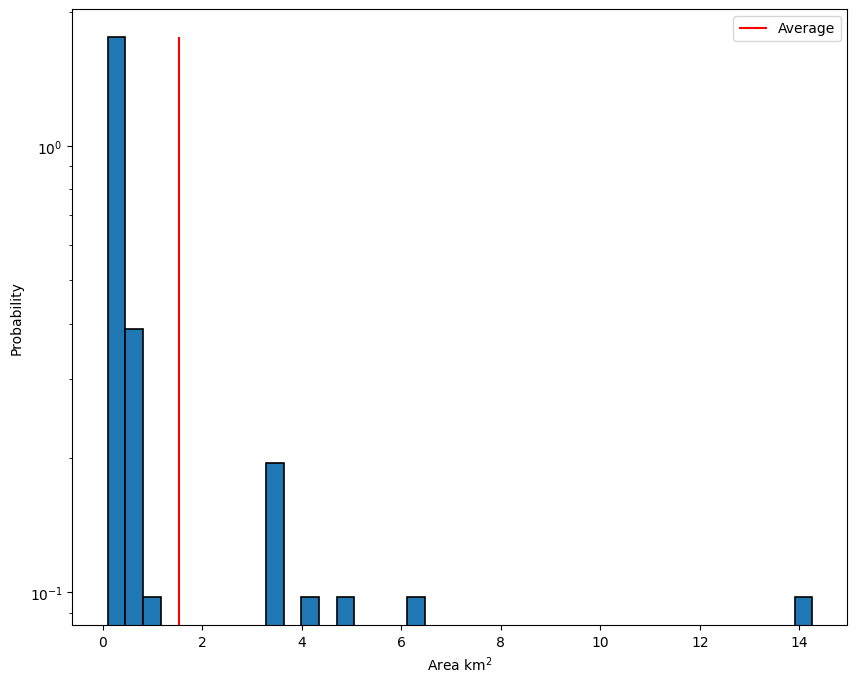

In [24]:
fig = plt.figure(figsize=(10,8))

#plt.figure(figsize=(10,8))
data = np.asarray(detected_icebergs['area_km2'].values)
n, bins, _ = plt.hist(data, bins=40, density=True, edgecolor='black', linewidth=1.2)

plt.vlines(np.nanmean(data), ymin=0, ymax=np.max(n), color='red', label='Average')

#plt.title("histogram")
plt.ylabel('Probability')
plt.xlabel('Area km$^{2}$')
plt.yscale('log')
plt.legend()
#plt.savefig('Area_distribution.jpg', dpi=300)

## 4.Helper functions

### 4.1 Auxiliary heuristics

In [25]:
def check_heuristics(delta_km, delta_days, area, speed, pairs=False):

    speed_tsh = 0.
    days_tsh = 0.

    if 0. < area <= 1.:
        radius = 9. * delta_days
        speed_tsh = 6.5 * 2
        days_tsh = 25

    if 1. < area <= 10.:
        radius = 6.5 * delta_days #* 2 7.5
        speed_tsh = 6.5 * 2
        days_tsh = 40

    if 10. < area <= 100.:
        radius = 4 * delta_days #* 2 5.5
        speed_tsh = 4. * 2
        days_tsh = 60

    if 100. < area <= 1000.:
        radius = 2.3 * delta_days * 1.5
        speed_tsh = 2.3 * 2
        days_tsh = 70 if area < 500 else 120

    if area > 1000.:
        radius = 2.5 * delta_days * 2 # 2.5
        speed_tsh = 2.32 * 2
        days_tsh = 90 if area < 1500 else 180

    #is_dist_max = True if delta_km < max_dist else False #550
    is_dist_max = True
    is_radius = True if delta_km <= radius else False
    is_speed = True if speed <= speed_tsh else False
    is_days = True if delta_days <= days_tsh else False

    return [is_dist_max, is_radius, is_speed, is_days]

In [26]:
def moving_average(x, w):
    return (np.convolve(x, np.ones(w), 'valid') / w) ##.astype(int)

### 4.2 Clean possible iceberg

In [27]:
def clean_track(iceberg_to_clean, berg_individual_id, main_bar, smooth_len):

    save_base = iceberg_to_clean.copy()

    total_samples = len(iceberg_to_clean.index)

    last_id_valid = iceberg_to_clean.first_valid_index()
    last_id_valid_check = -1

    indexes_used = []

    while len(iceberg_to_clean.index) > 1:

        clear_output(wait=True)
        bar_length=20
        progress = float(total_samples-len(iceberg_to_clean.index))/(total_samples)
        block = int(round(bar_length * progress))
        progressbarmain = "Global progress: [{0}] {1:.1f}%".format( "#" * int(main_bar[0]) + "-" * (bar_length - int(main_bar[0])), main_bar[1] * 100.)
        progressbar = "Filtering progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100.)
        print(progressbarmain)
        print(progressbar, 'Total detections for current track: ', len(indexes_used))

        if last_id_valid != last_id_valid_check:

            area_base = iceberg_to_clean.loc[last_id_valid,'area_km2']

            iceberg_base_signature = moving_average(np.sort(np.asarray(json.loads(iceberg_to_clean.loc[last_id_valid,'shape']))).tolist(), smooth_len)

            iceberg_to_clean['jcd_to_base'] = iceberg_to_clean.apply(lambda row : measures.jaccard_similarity(iceberg_base_signature, moving_average(np.sort(np.asarray(json.loads(row['shape']))).tolist(),smooth_len)), axis = 1)
            iceberg_to_clean['k_s'] = iceberg_to_clean.apply(lambda row : 1 - stats.ks_2samp(iceberg_base_signature, moving_average(np.sort(np.asarray(json.loads(row['shape']))).tolist(),smooth_len))[0], axis = 1)
            #iceberg_to_clean['vonmisses'] = iceberg_to_clean.apply(lambda row : 1 - stats.cramervonmises_2samp(iceberg_base_signature, moving_average(np.sort(np.asarray(json.loads(row['shape']))).tolist(),smooth_len)).statistic, axis = 1)
            #iceberg_to_clean.loc[iceberg_to_clean['vonmisses'] < 0, 'vonmisses'] = 0

            iceberg_to_clean['sim_score'] = (iceberg_to_clean['jcd_to_base'] + iceberg_to_clean['k_s'])/2
            iceberg_to_clean = iceberg_to_clean.sort_values(by=['sim_score'], ascending=[False])

            if area_base < 1000:
                sim_tsh = 0.7
                sim_id = 1
            else:
                sim_tsh = 0.65
                sim_id = 1

        next_id = iceberg_to_clean.index[1]

        sims = [iceberg_to_clean.loc[next_id,'jcd_to_base'],
                iceberg_to_clean.loc[next_id,'k_s'],
                iceberg_to_clean.loc[next_id,'sim_score']]

        #if sim_pair_k_s > sim_tsh: #0.85
        if sims[sim_id] > sim_tsh:

            indexes_used.append(last_id_valid)
            iceberg_to_clean.drop(last_id_valid, inplace=True)
            last_id_valid_check = last_id_valid
            last_id_valid = next_id

        else:

            iceberg_to_clean.drop(next_id, inplace=True)
            last_id_valid_check = last_id_valid


    if len(indexes_used) >= 5:

        berg_to_save = save_base.loc[indexes_used, :].sort_values(by=['datetime'], ascending=[True])
        berg_to_look = berg_to_save.copy()

        indexes_used_final = []
        while len(berg_to_look.index) > 0:

            indexes_used = berg_to_look.index.tolist()

            idx_start_look = berg_to_look.first_valid_index()
            idx_ant = idx_start_look
            row_ant = berg_to_look.loc[idx_ant, :]

            for index, row in berg_to_save.loc[idx_ant:, :].iterrows():

                droped = False
                if idx_ant != index:

                    dkm = round(geodist((row_ant['latitude'], row_ant['longitude']), (row['latitude'], row['longitude'])).km, 3)
                    ddays = abs((row['datetime'] - row_ant['datetime']).days)

                    ddays = 1. if ddays == 0. else ddays
                    dspeed = round(dkm/ddays, 3)

                    area_change = abs(row['area_km2'] - row_ant['area_km2'])
                    area_dst = area_change / row_ant['area_km2']

                    heuristics = check_heuristics(dkm, ddays, row_ant['area_km2'], dspeed, pairs=True)

                    #if not all(heuristics):
                    if not heuristics[1] or not heuristics[3] or not area_dst < 0.5 : # increase area dst < 0.21
                        droped = True
                        indexes_used.pop(indexes_used.index(index))

                if not droped:
                    row_ant = row
                    idx_ant = index

            if len(indexes_used) > len(indexes_used_final):
                indexes_used_final = indexes_used

            berg_to_look.drop(idx_start_look, inplace=True)


        berg_to_look = berg_to_save.loc[indexes_used_final]
        if berg_to_look.shape[0] >= 3:
            berg_to_look.to_csv('/content/drive/MyDrive/icebergtrack/sentinel1/'+str(berg_individual_id)+'_'+str(indexes_used_final[0])+'.txt', mode = 'w', columns = ['datetime','latitude','longitude','majoraxis_km', 'area_km2'], sep=' ', index=False)

    else:
        indexes_used_final = indexes_used

    return indexes_used_final

## 5.Main Loop tracking procedure

In [28]:
# Start measuring the processing time
t0 = time.process_time()

# Sort the iceberg dataframe by 'datetime' in ascending order
iceberg_control = detected_icebergs.copy().sort_values(by='datetime', ascending=True)
# iceberg_control = detected_icebergs

# Initialize the index to start processing the first iceberg
idx = iceberg_control.first_valid_index()

In [29]:
measures = Similarity()

original_iceberg_data = iceberg_control.copy()  # Save original iceberg data

### process each iceberg

In [30]:
# Start the main loop to process each iceberg until none remain
while len(iceberg_control.index) > 0:

    # Initialize progress bar variables
    progressbar = 0
    indexes = iceberg_control.index
    idx = iceberg_control.first_valid_index()

    # Perform garbage collection to free memory
    gc.collect()

    # If the current iceberg is still valid, proceed
    if idx in indexes:

        # Clear the previous output and update the progress bar
        clear_output(wait=True)
        bar_length = 20
        progress = float(num_ices - len(indexes)) / num_ices  # Progress as a percentage
        block = int(round(bar_length * progress))
        progressbar = "Global progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100.)
        print(progressbar)

        # Track the progress and display the current block and progress percentage
        main_bar = [block, progress]

        # Retrieve the current iceberg's data
        iceberg_base = iceberg_control.loc[idx, :]

        # Extract the 'datetime' and 'area_km2' of the current iceberg
        date_iceberg_base = iceberg_base['datetime']
        area_iceberg_base = iceberg_base['area_km2']

        # Adjust the smoothing length based on iceberg size
        if area_iceberg_base > 50:
            smooth_len = 3  # Larger icebergs use a larger smoothing window
        else:
            smooth_len = 2  # Smaller icebergs use a smaller smoothing window

        # Adjust the threshold for the number of years to search for similar icebergs based on size
        if area_iceberg_base > 100:
            delta_years_ths = 10  # Larger icebergs have a longer time threshold
        else:
            delta_years_ths = 5  # Smaller icebergs have a shorter time threshold

        # Create a morpho-signature of the iceberg by applying a moving average to its shape
        iceberg_base_morpho_signature = moving_average(np.sort(np.asarray(json.loads(iceberg_base['shape']))).astype(int).tolist(), smooth_len)

        # Filter icebergs based on their longitude (only considering those in the Weddell Sea for now)
        # c2 = iceberg_control['longitude'] > -65  # Longitude threshold for Weddell Sea
        # possible_icebergs_df = iceberg_control.loc[c2]
        possible_icebergs_df = iceberg_control.copy()

        # Further filter by icebergs that are within the time threshold 'delta_years_ths'
        possible_icebergs_df = possible_icebergs_df[((possible_icebergs_df['datetime'] - iceberg_base['datetime']).dt.days) / 365 <= delta_years_ths]

        # If there are any possible matching icebergs, proceed
        if not possible_icebergs_df.empty:

            # Calculate similarity scores using Jaccard similarity and Kolmogorov-Smirnov test
            possible_icebergs_df['jcd_to_base'] = possible_icebergs_df.apply(lambda row: measures.jaccard_similarity(iceberg_base_morpho_signature, moving_average(np.sort(np.asarray(json.loads(row['shape']))).tolist(), smooth_len)), axis=1)
            possible_icebergs_df['k_s'] = possible_icebergs_df.apply(lambda row: 1 - stats.ks_2samp(iceberg_base_morpho_signature, moving_average(np.sort(np.asarray(json.loads(row['shape']))).tolist(), smooth_len))[0], axis=1)

            # Compute the average similarity score between Jaccard and KS similarity measures
            possible_icebergs_df['sim_score'] = (possible_icebergs_df['jcd_to_base'] + possible_icebergs_df['k_s']) / 2

            # Filter icebergs with a similarity score greater than 0.5 and sort by score in descending order
            possible_individual_iceberg_df = possible_icebergs_df[(possible_icebergs_df['sim_score'] > 0.5)].sort_values(by='sim_score', ascending=False)

            # If there are matching icebergs, find the index to drop
            if not len(possible_individual_iceberg_df['jcd_to_base']) == 0:
                print("there are matching icebergs")
                index_to_drop = clean_track(possible_individual_iceberg_df, idx, main_bar, smooth_len)

                # If no matching icebergs found, keep the current index
                if index_to_drop == []:
                    index_to_drop = idx
            else:
                index_to_drop = idx

            # Drop the matched icebergs from the main dataframe
            iceberg_control.drop(index_to_drop, inplace=True)

        else:
            # If no matching icebergs are found, drop the current iceberg
            print("no matching icebergs are found")
            iceberg_control.drop(indexes, inplace=True)

    # Finalize progress after each iteration
    clear_output(wait=True)
    bar_length = 20
    progress = float(num_ices) / num_ices
    block = int(round(bar_length * progress))
    progressbar = "Global progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100.)
    print(progressbar)

# Calculate the total processing time and print it
t1 = (time.process_time() - t0) / 60.
print("Total time elapsed: ", round(t1, 3), 'minutes')  # CPU time elapsed in minutes

Global progress: [####################] 100.0%
Total time elapsed:  0.098 minutes


## 6.draw iceberg track

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
df = pd.read_table('/content/drive/MyDrive/icebergtrack/sentinel1/59_59.txt', delim_whitespace=True)
df

,datetime,latitude,longitude,majoraxis_km,area_km2
0,2022-01-04,66.238010,-37.456276,0.51,0.093
1,2022-01-28,66.276678,-37.657312,0.55,0.087
2,2022-02-11,66.189387,-37.730393,0.37,0.071


In [ ]:
# Convert datetime column to a proper format
df['datetime'] = pd.to_datetime(df['datetime'])

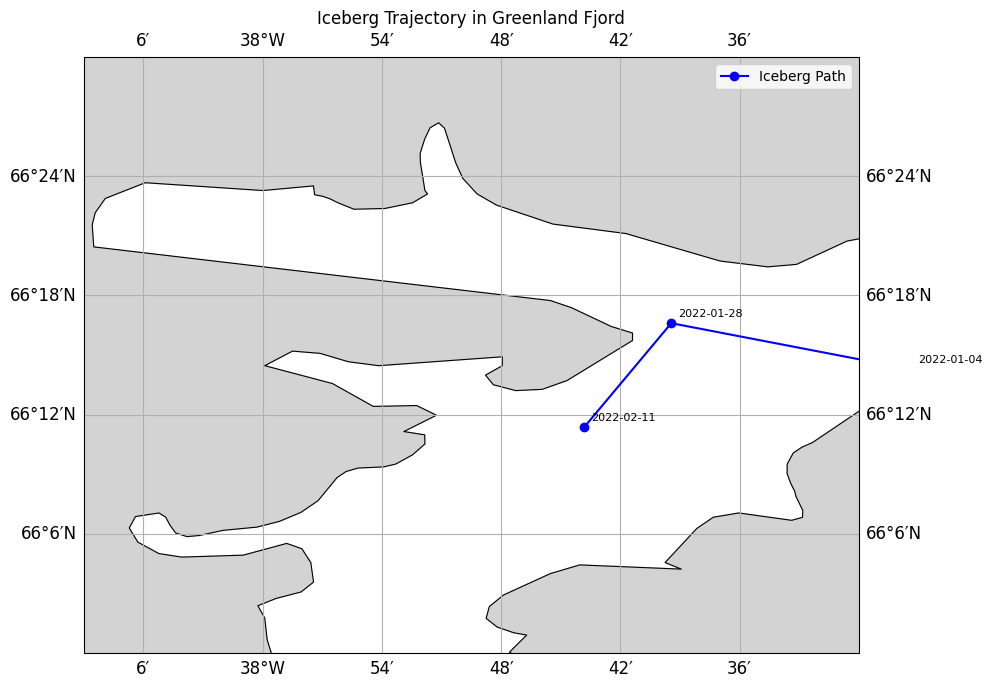

In [ ]:
# Create a figure with Cartopy
# projection = ccrs.epsg(32624) # ccrs.Mercator() # ccrs.PlateCarree()
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection}) # figsize=(10, 10),

# Add natural Earth features (land, ocean, coastlines)
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# **Zoom in by adjusting extent
ax.set_extent([-38.15, -37.5, 66, 66.5], crs=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.xlabel_style = {'size': 12, 'rotation': 0}
gl.ylabel_style = {'size': 12}

# # **Set latitude and longitude ticks manually**
# ax.set_xticks([-40, -39, -38, -37, -36, -35], crs=ccrs.PlateCarree())  # Longitude ticks
# ax.set_yticks([65, 66, 67], crs=ccrs.PlateCarree())  # Latitude ticks

# Plot iceberg trajectory
ax.plot(df['longitude'], df['latitude'], marker='o', linestyle='-', color='b', label='Iceberg Path', transform=ccrs.PlateCarree())

# Annotate points with dates
for i, txt in enumerate(df['datetime'].dt.strftime('%Y-%m-%d')):
    ax.annotate(txt, (df['longitude'][i], df['latitude'][i]), fontsize=8, xytext=(5,5), textcoords='offset points')

# Labels and title
plt.title("Iceberg Trajectory in Greenland Fjord")
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.5 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show

In [ ]:
!pip install rasterio pyproj

In [ ]:
from pyproj import Transformer

In [ ]:
# File paths
tif_path = "/content/drive/MyDrive/icebergtrack/sentinel1/hh/sermilik/2022-01-23.tif"
txt_path = "/content/drive/MyDrive/icebergtrack/sentinel1/224_224.txt"

# Load iceberg trajectory data
df = pd.read_csv(txt_path, delim_whitespace=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,latitude,longitude,majoraxis_km,area_km2
0,2022-01-23,66.365489,-37.897141,1.11,0.496
1,2022-01-28,66.366204,-37.897776,1.02,0.432
2,2022-02-11,66.366646,-37.897312,0.97,0.396


In [ ]:
# Define transformation: EPSG 4326 (Lat/Lon) → EPSG 32624 (UTM Zone 24N)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32624", always_xy=True)

# Convert longitude & latitude to the new projection
df[['utm_x', 'utm_y']] = df.apply(lambda row: transformer.transform(row['longitude'], row['latitude']), axis=1, result_type="expand")
df

,datetime,latitude,longitude,majoraxis_km,area_km2,utm_x,utm_y
0,2022-01-23,66.365489,-37.897141,1.11,0.496,549335.546946,7.361084e+06
1,2022-01-28,66.366204,-37.897776,1.02,0.432,549305.711211,7.361164e+06
2,2022-02-11,66.366646,-37.897312,0.97,0.396,549325.601701,7.361213e+06


In [ ]:
df_select = df.copy().iloc[0:3]
df_select

,datetime,latitude,longitude,majoraxis_km,area_km2,utm_x,utm_y
0,2022-01-23,66.365489,-37.897141,1.11,0.496,549335.546946,7.361084e+06
1,2022-01-28,66.366204,-37.897776,1.02,0.432,549305.711211,7.361164e+06
2,2022-02-11,66.366646,-37.897312,0.97,0.396,549325.601701,7.361213e+06


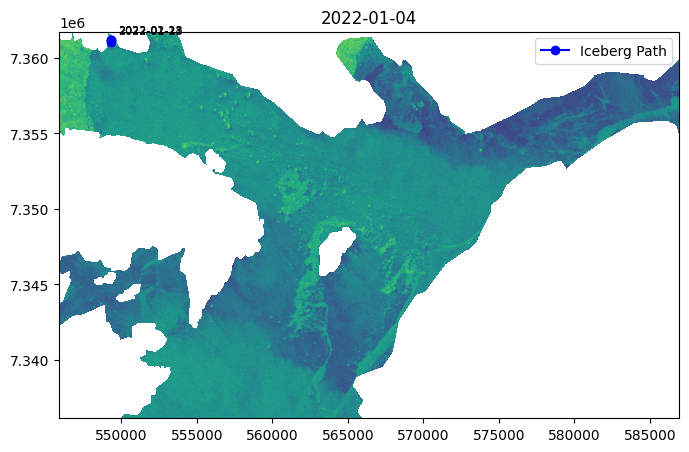

In [ ]:
# Open the TIFF file
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(8, 10))

    # Plot the TIFF map as a background
    show(src, ax=ax)

    # Plot iceberg trajectory (now in UTM coordinates)
    ax.plot(df_select['utm_x'], df_select['utm_y'], marker='o', linestyle='-', color='b', label="Iceberg Path")

    # Annotate each point with the date
    for i, txt in enumerate(df_select['datetime'].dt.strftime('%Y-%m-%d')):
        ax.annotate(txt, (df_select['utm_x'][i], df_select['utm_y'][i]), fontsize=8, xytext=(5,5), textcoords='offset points')

    # Labels and legend
    # ax.set_xlabel("Easting (m)")
    # ax.set_ylabel("Northing (m)")
    ax.set_title("2022-01-04")
    ax.legend()

    plt.show()

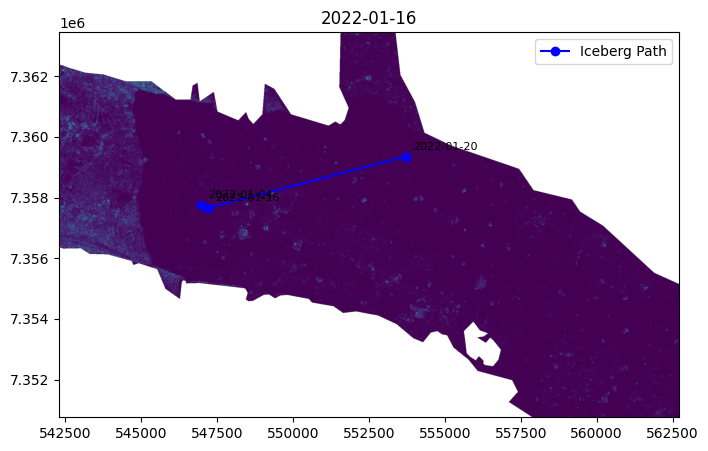

In [ ]:
tif_path = "/content/drive/MyDrive/icebergtrack/sentinel1/hh/mark1.0/2022-01-28.tif"
# Open the TIFF file
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(8, 10))

    # Plot the TIFF map as a background
    show(src, ax=ax)

    # Plot iceberg trajectory (now in UTM coordinates)
    ax.plot(df_select['utm_x'], df_select['utm_y'], marker='o', linestyle='-', color='b', label="Iceberg Path")

    # Annotate each point with the date
    for i, txt in enumerate(df_select['datetime'].dt.strftime('%Y-%m-%d')):
        ax.annotate(txt, (df_select['utm_x'][i], df_select['utm_y'][i]), fontsize=8, xytext=(5,5), textcoords='offset points')

    # Labels and legend
    # ax.set_xlabel("Easting (m)")
    # ax.set_ylabel("Northing (m)")
    ax.set_title("2022-01-16")
    ax.legend()

    plt.show()

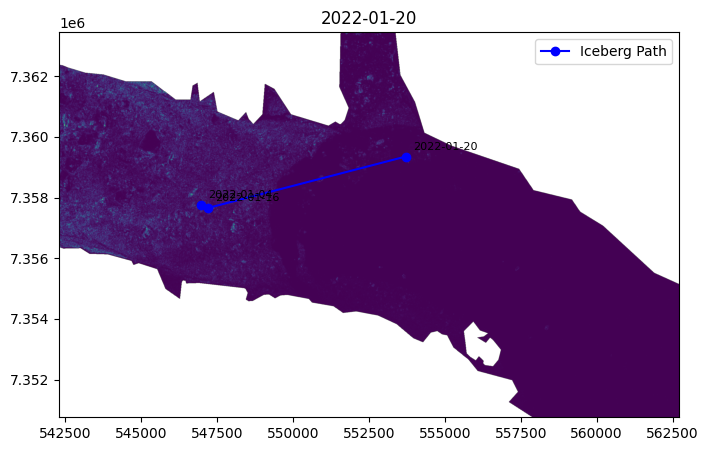

In [ ]:
tif_path = "/content/drive/MyDrive/icebergtrack/sentinel1/hh/mark1.0/2022-01-20.tif"
# Open the TIFF file
with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(8, 10))

    # Plot the TIFF map as a background
    show(src, ax=ax)

    # Plot iceberg trajectory (now in UTM coordinates)
    ax.plot(df_select['utm_x'], df_select['utm_y'], marker='o', linestyle='-', color='b', label="Iceberg Path")

    # Annotate each point with the date
    for i, txt in enumerate(df_select['datetime'].dt.strftime('%Y-%m-%d')):
        ax.annotate(txt, (df_select['utm_x'][i], df_select['utm_y'][i]), fontsize=8, xytext=(5,5), textcoords='offset points')

    # Labels and legend
    # ax.set_xlabel("Easting (m)")
    # ax.set_ylabel("Northing (m)")
    ax.set_title("2022-01-20")
    ax.legend()

    plt.show()

### create gif

In [ ]:
pip install pillow

In [ ]:
from PIL import Image
import glob

# Path to your images (modify as needed)
image_folder = "/content/drive/MyDrive/icebergtrack/sentinel1/gif_frame/"
image_files = sorted(glob.glob(image_folder + "*.jpg"))  # Change to .jpg, .tif if needed

# Load images
frames = [Image.open(img) for img in image_files]

# Save as GIF
output_gif = "/content/drive/MyDrive/icebergtrack/sentinel1/iceberg_animation.gif"
frames[0].save(output_gif, save_all=True, append_images=frames[1:], duration=500, loop=0)

print(f"GIF saved at {output_gif}")

GIF saved at /content/drive/MyDrive/icebergtrack/sentinel1/iceberg_animation.gif
